# Сетап

## Либы

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Основная часть

In [12]:
# Загрузка данных
data_path = '../ASA-Data/numbers.csv'
df = pd.read_csv(data_path)

In [7]:
target_col = 'result'

In [ ]:
target_col = 'alert'

In [ ]:
# Загрузка данных
data_path = '../ASA-Data/cleaned_dataset.csv'
df = pd.read_csv(data_path)

In [ ]:
# Определение размера чанка
chunk_size = 500000  # Укажите нужный размер чанка

# Вычисление количества чанков
num_chunks = (len(df) // chunk_size) + (1 if len(df) % chunk_size != 0 else 0)

# Разбиение и сохранение чанков
for i in range(num_chunks):
    start_index = i * chunk_size
    end_index = (i + 1) * chunk_size
    df_chunk = df[start_index:end_index]
    
    # Сохранение текущего чанка в CSV файл
    file_name = f'../ASA-Data/cleaned_dataset_chunk{i}.csv'
    df[start_index:end_index].to_csv(file_name, index=False)
    
    print(f'Сохранен файл {file_name} с {start_index} по {end_index} строку.')

print(f'Общее количество чанков: {num_chunks}')

In [ ]:
# Загрузка данных
data_path = '../ASA-Data/low_served.csv'
df = pd.read_csv(data_path) #, nrows=1000000)

In [ ]:
lo = [ 'eth.src', 'eth.dst', 'ip.src', 'ip.dst' ]
df.drop(lo, axis=1, inplace=True)

In [13]:
print(len(df.columns))
for column in df.columns:
    print(f"{column}")

11
oper0
oper1
oper2
oper3
opand0
opand1
opand2
opand3
opand4
target
result


In [14]:
df.head()

,oper0,oper1,oper2,oper3,opand0,opand1,opand2,opand3,opand4,target,result
0,0.25,0.00,0.75,0.00,0.23225,0.21662,0.21891,0.69452,0.99420,0.71479,1
1,0.75,0.50,0.00,0.75,0.40022,0.06943,0.69548,0.86058,0.09366,0.64299,0
2,0.00,0.75,0.25,0.50,0.97388,0.21556,0.44696,0.77625,0.28900,0.61628,0
3,0.75,0.50,0.50,0.00,0.38641,0.77762,0.15890,0.81743,0.36985,0.60013,1
4,0.50,0.75,0.00,0.50,0.96803,0.74497,0.63718,0.89167,0.26361,0.48156,0


In [15]:
# Подсчет количества каждого класса в столбце 'alert'
class_counts = df[target_col].value_counts()
print("Количество каждого класса:\n", class_counts)

# Вычисление процентного соотношения каждого класса
class_percentages = class_counts / len(df) * 100
print("Процентное соотношение каждого класса:\n", class_percentages)

Количество каждого класса:
 result
0    8169
1    1831
Name: count, dtype: int64
Процентное соотношение каждого класса:
 result
0    81.69
1    18.31
Name: count, dtype: float64


In [ ]:
df.head()

In [16]:
# Отбор строк с alert = 1
df_alert_1 = df[df[target_col] == 1]
count_alert_1 = df_alert_1.shape[0]

# Отбор строк с alert = 0
df_alert_0 = df[df[target_col] == 0]
count_alert_0 = df_alert_0.shape[0]

# Если строк с alert = 1 больше чем строк с alert = 0, то
# делаем отбор только доступного количества строк с alert = 0
if count_alert_1 > count_alert_0:
    df_alert_1 = df_alert_1.sample(n=count_alert_0, random_state=42)
    count_alert_1 = count_alert_0

# Отбор строк с alert = 0 (количество строк соответствует количеству строк с alert = 1)
df_alert_0 = df_alert_0.sample(n=count_alert_1, random_state=42)

# Объединение данных в новый DataFrame
df_final = pd.concat([df_alert_1, df_alert_0])

# Перемешивание строк в df_final (необязательно, но рекомендуется)
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверка итогового количества строк в новом DataFrame
print(f"Количество строк с {target_col} = 1: {df_final[df_final[target_col] == 1].shape[0]}")
print(f"Количество строк с {target_col} = 0: {df_final[df_final[target_col] == 0].shape[0]}")
print(f"Общее количество строк в df_final: {df_final.shape[0]}")

Количество строк с result = 1: 1831
Количество строк с result = 0: 1831
Общее количество строк в df_final: 3662


In [ ]:
df_final.to_csv('../ASA-Data/final_equal.csv', index=False)

In [2]:
df_final = pd.read_csv('../ASA-Data/final_equal.csv')

In [ ]:
lo = [ 'eth.src', 'eth.dst', 'ip.src', 'ip.dst' ]
df_final.drop(lo, axis=1, inplace=True)

In [ ]:
df[(df['alert'] == 1)]

In [17]:
# Подсчет количества каждого класса в столбце 'alert'
class_counts = df_final[target_col].value_counts()
print("Количество каждого класса:\n", class_counts)

# Вычисление процентного соотношения каждого класса
class_percentages = class_counts / len(df_final) * 100
print("Процентное соотношение каждого класса:\n", class_percentages)

Количество каждого класса:
 result
0    1831
1    1831
Name: count, dtype: int64
Процентное соотношение каждого класса:
 result
0    50.0
1    50.0
Name: count, dtype: float64


In [18]:
# Предполагая, что 'alert' - это целевой столбец
target_column = target_col
X = df_final.drop(columns=[target_column])
y = df_final[target_column]

# Разделение данных на обучающую, тестовую и валидационную выборки
# temp = 40%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
inp_size = X_train.shape[1]
inp_size

10

In [78]:
# 1 - Создание модели
model = Sequential()
model.add(Dense(1024, input_dim=inp_size, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 2 - Создание модели
model = Sequential()
model.add(Dense(128, input_dim=inp_size, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
# 3 - Создание модели
model = Sequential()
model.add(Dense(128, input_dim=inp_size, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

In [20]:
# 4 - Создание модели
model = Sequential()
model.add(Dense(128, input_dim=inp_size, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
# 5 - Создание модели
model = Sequential()
model.add(Dense(32, input_dim=inp_size, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# 6 - Создание модели
# ГЛАВНАЯ
model = Sequential()
model.add(Dense(230, input_dim=inp_size, activation='relu'))
model.add(Dense(412, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(412, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(72, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Используйте 'softmax' для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Используйте 'categorical_crossentropy' для многоклассовой классификации

c:\Users\Sargeras\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=24, validation_data=(X_val, y_val))

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4007 - val_accuracy: 0.8074 - val_loss: 0.4044
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8326 - loss: 0.3764 - val_accuracy: 0.7705 - val_loss: 0.4286
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.3901 - val_accuracy: 0.8046 - val_loss: 0.4047
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4065 - val_accuracy: 0.7910 - val_loss: 0.4170
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.3837 - val_accuracy: 0.7883 - val_loss: 0.4199
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.3993 - val_accuracy: 0.7814 - val_loss: 0.4188
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8077 - loss: 0.3972 - val_accuracy: 0.8019 - val_loss: 0.4084
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.3911 - val_accuracy: 0.7951 - val_loss:

In [26]:
# Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4113 
Test Loss: 0.4105016589164734, Test Accuracy: 0.8008185625076294


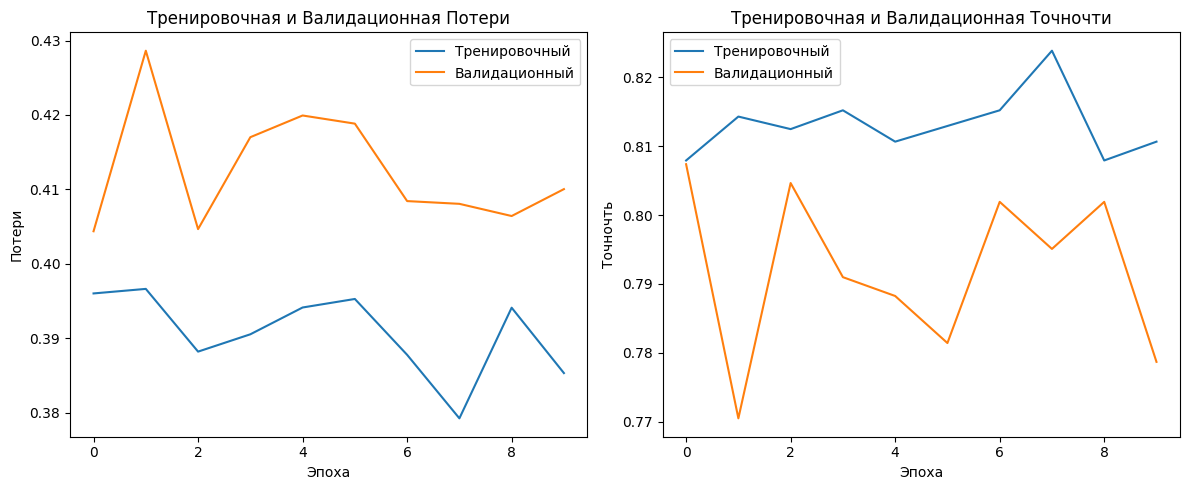

In [27]:
# Построение графика потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренировочный')
plt.plot(history.history['val_loss'], label='Валидационный')
plt.title('Тренировочная и Валидационная Потери')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# Построение графика точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренировочный')
plt.plot(history.history['val_accuracy'], label='Валидационный')
plt.title('Тренировочная и Валидационная Точночти')
plt.xlabel('Эпоха')
plt.ylabel('Точночть')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Предсказания на тестовом наборе данных
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Построение матрицы ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


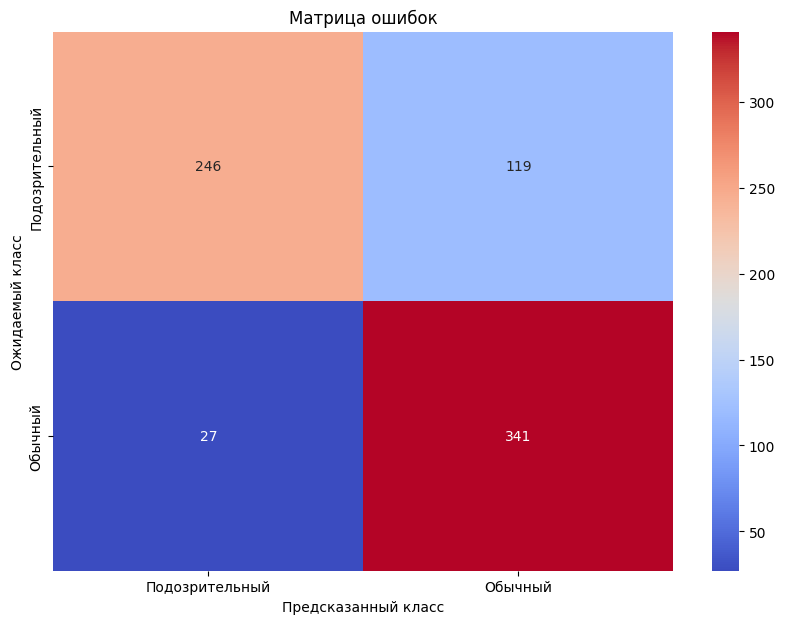

In [29]:
# Визуализация матрицы ошибок в виде тепловой карты
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Подозрительный', 'Обычный'], yticklabels=['Подозрительный', 'Обычный'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Ожидаемый класс')
plt.title('Матрица ошибок')
plt.show()

# Проверка на остатках

In [30]:
# Инициализация пустых массивов для хранения предсказаний и истинных меток
y_true_big = []
y_pred_big = []

chunk_size = 2

In [31]:
# Размер порции данных
chunk_size = 500000

# Количество итераций, необходимых для обработки всего df
num_chunks = len(df) // chunk_size + int(len(df) % chunk_size > 0)
num_chunks

1

In [33]:
for i in range(chunk_size - 1):
    print(i)
    # Извлечение текущей порции данных
    df_chunk = df.iloc[i*chunk_size:(i+1)*chunk_size]
    #df_chunk = pd.read_csv(f'../ASA-Data/cleaned_dataset_chunk{i}.csv')

    # Формирование тестовой выборки (без alert)
    X_test_big = df_chunk.drop(columns=[target_col])

    # Прогон через обученную модель для получения предсказаний
    predictions = model.predict(X_test_big)

    # Сохранение результатов предсказаний и истинных меток
    y_true_big.extend(df_chunk[target_col].values)
    y_pred_big.extend(predictions)

0


KeyError: "['alert'] not found in axis"

In [89]:
y_pred_big = (np.array(y_pred_big) > 0.5).astype("int32")

In [90]:
big_conf_matrix = confusion_matrix(y_true_big, y_pred_big)

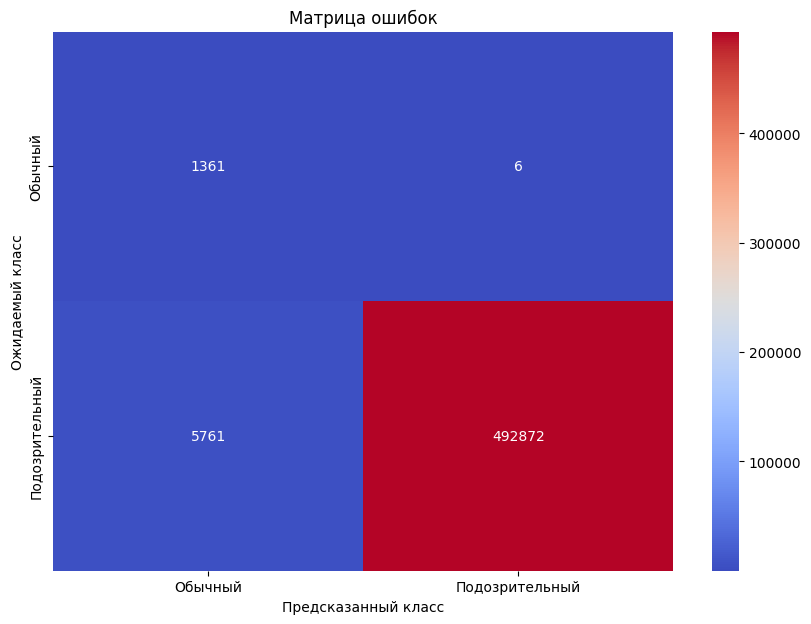

In [91]:
# Визуализация матрицы ошибок в виде тепловой карты
plt.figure(figsize=(10, 7))
sns.heatmap(big_conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Обычный', 'Подозрительный'], yticklabels=['Обычный', 'Подозрительный'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Ожидаемый класс')
plt.title('Матрица ошибок')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Вычисление TP, FP, TN, FN
TP = sum((np.array(y_true_big[i]) == 1) and (np.array(y_pred_big[i]) == 1) for i in range(len(y_true_big)))
FP = sum((np.array(y_true_big[i]) == 0) and (np.array(y_pred_big[i]) == 1) for i in range(len(y_true_big)))
TN = sum((np.array(y_true_big[i]) == 0) and (np.array(y_pred_big[i]) == 0) for i in range(len(y_true_big)))
FN = sum((np.array(y_true_big[i]) == 1) and (np.array(y_pred_big[i]) == 0) for i in range(len(y_true_big)))

# Вывод статистики
print("Количество правильно предсказанных трафиков (TP):", TP)
print("Количество неправильно предсказанных трафиков (FP):", FP)
print("Количество правильно не предсказанных трафиков (TN):", TN)
print("Количество неправильно не предсказанных трафиков (FN):", FN)

# Вычисление общей точности предсказаний
accuracy = accuracy_score(y_true_big, y_pred_big)
print("Общая точность предсказаний:", accuracy)

# Вычисление точности (precision), полноты (recall) и F1-меры
precision = precision_score(y_true_big, y_pred_big)
recall = recall_score(y_true_big, y_pred_big)
f1 = f1_score(y_true_big, y_pred_big)

print("Точность (precision):", precision)
print("Полнота (recall):", recall)
print("F1-мера:", f1)

In [ ]:
# Сравнение значений и вывод результата
if FP > FN:
    print("Модель склонна маркировать обычный трафик как подозрительный (1 вместо 0)")
elif FN > FP:
    print("Модель склонна маркировать подозрительный трафик как обычный (0 вместо 1)")
else:
    print("Модель делает ошибки в предсказаниях сбалансированно")